In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
data = pd.read_parquet('../data/processed/PurpleAir daily individual.parquet')[['Channel A PM2.5 (ug/m3)']]

In [26]:
data_by_sensor = data.reset_index()
data_by_sensor['created_at'] = data_by_sensor['created_at'].dt.strftime('%m-%d')
for i, value in enumerate(data_by_sensor['created_at']):
        data_by_sensor.loc[i, 'created_at'] =value.lstrip("0").replace(" 0", " ")
for i, value in enumerate(data_by_sensor['sensor_name']):
        data_by_sensor.loc[i, 'sensor_name'] =value.replace("PA_II_", "")
data_by_sensor=data_by_sensor.pivot(index='created_at',columns='sensor_name', values='Channel A PM2.5 (ug/m3)')

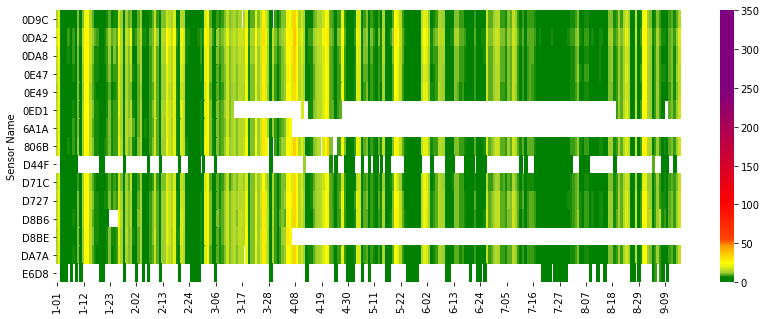

In [46]:
colors = ['green', 
          'green',
          'yellowgreen', 
          'yellow', 
          'orange', 
          'orangered', 
          'red',
          'purple', 
          'purple']
nodes = [0, 
         6/350, #green midpt
         12/350, # boundary 
         24/350, # yellow midpt 
         45/350, # orange midpt
         55/350, # boundary
         103/350, # red midpt
         250/350, # purple midpt
         350/350]
cmap = LinearSegmentedColormap.from_list("mycmap",list(zip(nodes, colors)))
fig, ax = plt.subplots(1,1)
sns.heatmap(data_by_sensor.T, cmap=cmap, vmin=0,vmax=350)
fig.set_size_inches(14,5)
ax.set_xlabel('')
ax.set_ylabel('Sensor Name')
plt.savefig('PA_Heatmap.jpg', transparent=False)

In [28]:
data_by_sensor

sensor_name,0D9C,0DA2,0DA8,0E47,0E49,0ED1,6A1A,806B,D44F,D71C,D727,D8B6,D8BE,DA7A,E6D8
created_at,,,,,,,,,,,,,,,
1-01,13.821972,19.353861,16.959615,16.065717,14.542194,16.206022,16.257931,15.673046,NaN,14.589042,15.533653,15.760403,14.785861,14.612889,NaN
1-02,20.649250,24.839708,24.204236,22.419675,22.025500,22.699444,23.046113,23.823635,NaN,20.775042,22.820403,22.543120,22.792583,21.662726,NaN
1-03,2.978492,4.950292,4.215444,3.329919,3.100236,3.333097,4.610497,4.269011,2.459069,3.270306,3.825900,3.459986,3.587333,3.482347,3.562306
1-04,2.262434,3.922611,3.185500,2.074378,2.337667,2.517319,2.893764,3.079113,1.835528,2.516639,2.986153,2.228292,2.173472,2.370208,2.740236
1-05,2.596360,4.288694,3.922208,3.036267,2.984111,3.072708,3.775653,3.287417,2.123623,2.820917,3.054208,2.995446,4.392295,2.836393,3.134242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-11,8.480153,10.602622,9.882861,9.720997,9.353050,9.850097,NaN,10.312322,NaN,8.852539,10.109388,9.877065,NaN,9.144561,NaN
9-12,10.091986,12.226042,10.966417,10.963169,10.970944,11.080500,NaN,11.606383,NaN,10.814486,11.372524,11.186431,NaN,10.427232,NaN
9-13,7.402486,8.890153,8.058347,8.174006,8.022851,8.382069,NaN,8.401889,4.355333,8.930639,8.425736,8.324847,NaN,7.634574,NaN


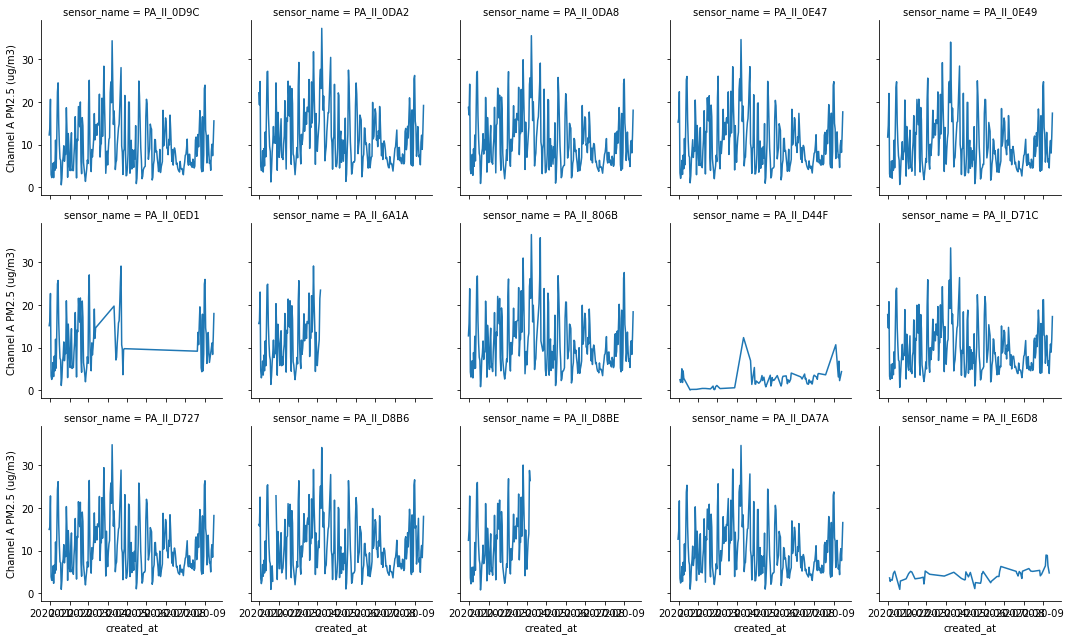

In [20]:
def scatter_facet_grid(data,x_col='created_at',y_col='Channel A PM2.5 (ug/m3)', bound=7000):
    #data = data.loc[(data[y_col]<bound) &(data[x_col]<bound)]
    g = sns.FacetGrid(data.reset_index(), col="sensor_name", palette=['blue','red'], col_wrap=5)
    g.map(sns.lineplot,x_col,y_col)
    
scatter_facet_grid(data)